# Question 3

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
raw_data = [['x', 'y', 'class'],
        [1, 0.5, 'c1'],
        [3, 0.5, 'c1'],
        [4, 0.5, 'c1'],
        [2, 1.5, 'c1'],
        [1, 2.5, 'c1'],
        [3, 2, 'c1'],
        [3, 4.5, 'c2'],
        [4, 4.5, 'c2'],
        [4.5, 3, 'c2'],
        [6, 3, 'c2'],
        [6, 4.5, 'c2']]

data = pd.DataFrame(raw_data[1:], columns=raw_data[0])
data['class'] = data['class'].map({'c1':1, 'c2':2})
data


,x,y,class
0,1.0,0.5,1
1,3.0,0.5,1
2,4.0,0.5,1
3,2.0,1.5,1
4,1.0,2.5,1
5,3.0,2.0,1
6,3.0,4.5,2
7,4.0,4.5,2
8,4.5,3.0,2
9,6.0,3.0,2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


def plot_decision_boundary(X, y, model, title, feat_name=None, svm=True):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
    if svm:
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='r', label='Support Vectors')
    if feat_name is None:
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    else:
        plt.xlabel(f"{feat_name[0]}")
        plt.ylabel(f"{feat_name[1]}")
    plt.legend()
    plt.title(title)
    plt.show()

def runner_copy(X, y, kernel="rbf", feat_name=None):
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X)

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    svm_binary = SVC(kernel=kernel)
    svm_binary.fit(X, y)

    #y_pred = svm_binary.predict(X_test)
    #print("Classification Report for Binary-class SVM:")
    #print(classification_report(y_test, y_pred))
    #print("Accuracy:", accuracy_score(y_test, y_pred))

    # get support vector
    support_vectors = svm_binary.support_vectors_
    support_vector_indices = svm_binary.support_
    support_vector_labels = y[support_vector_indices]
    support_vector_x = X[support_vector_indices, 0]
    support_vector_y = X[support_vector_indices, 1]

    print(f"number of sv: {len(support_vectors)}")
    print(f"sv ID: {support_vector_indices}")
    print(f"sv class: {support_vector_labels}")
    print(f"sv x: {support_vector_x}")
    print(f"sv y: {support_vector_y}")

    w = svm_binary.coef_[0]
    b = svm_binary.intercept_[0]

    print(f"equation: {w[0]:.2f} * x + {w[1]:.2f} * y + {b:.2f} = 0")

    # margin
    margin = 2 / np.linalg.norm(w)

    print(f"Margin: {margin}")

    plot_decision_boundary(X, y, svm_binary, title=f"Decision Boundary of SVM ({kernel} Kernel)", feat_name=feat_name)

number of sv: 3
sv ID: [5 6 8]
sv class: [1 2 2]
sv x: [3.  3.  4.5]
sv y: [2.  4.5 3. ]
equation: 0.80 * x + 0.80 * y + -5.00 = 0
Margin: 1.7678674656024582


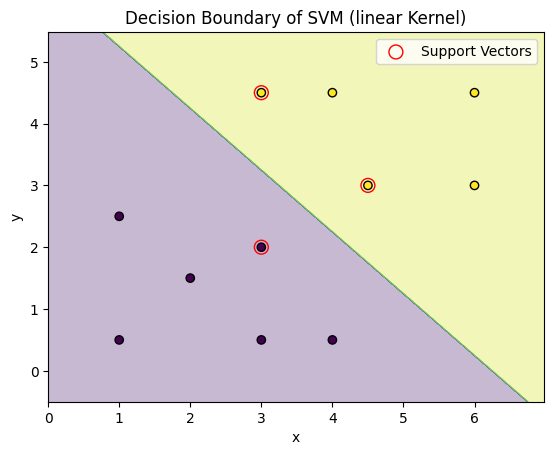

In [ ]:
# Binary classification: Select two classes (0 and 1) and two features
X = data[['x', 'y']].values
y = data['class'].values

runner_copy(X, y, kernel="linear", feat_name=["x", "y"])


# Question 5

1. acquire data

In [ ]:
from sklearn.datasets import load_wine
wine_df = load_wine(as_frame=True).frame
wine_df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


2. slect 2 featuures

In [ ]:
X = wine_df[['alcohol', 'malic_acid']].values
y = wine_df['target'].values

3. virtualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


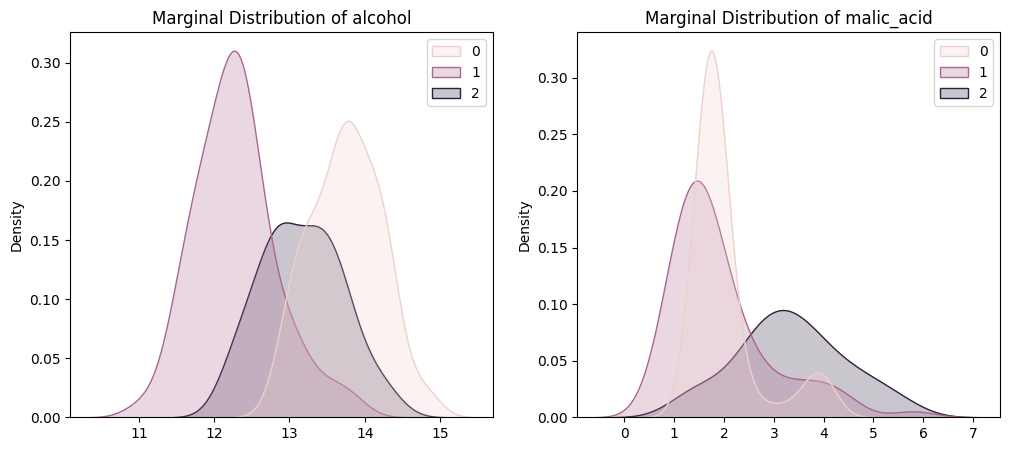

In [ ]:
# marginal distribution
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.kdeplot(x=X[:, 0], hue=y, fill=True, ax=axes[0])
axes[0].set_title("Marginal Distribution of alcohol")

sns.kdeplot(x=X[:, 1], hue=y, fill=True, ax=axes[1])
axes[1].set_title("Marginal Distribution of malic_acid")

plt.show()

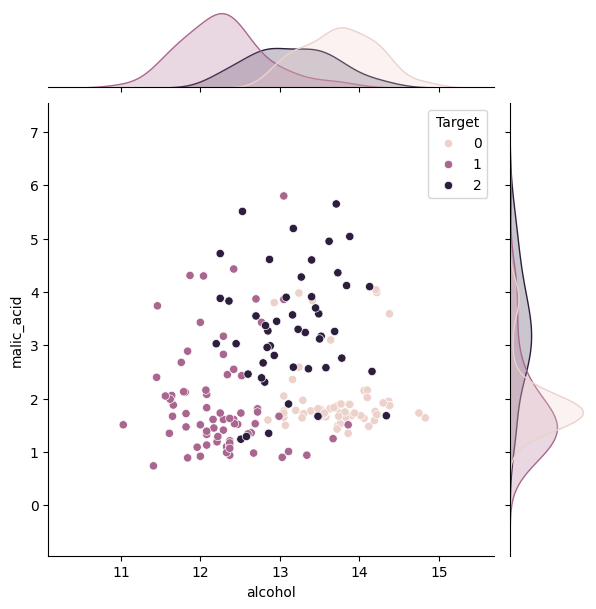

In [ ]:
# joint distribution

g = sns.jointplot(x=X[:, 0], y=X[:, 1], kind="scatter", hue=y)

g.ax_joint.legend(title="Target")

g.set_axis_labels("alcohol", "malic_acid")
plt.show()

5.1 Train an SVM model with a linear kernel

In [ ]:
from sklearn.model_selection import cross_val_score

def runner_binary(X, y, kernel="rbf", feat_name=None):
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    svm_binary = SVC(kernel=kernel)
    svm_binary.fit(X_train, y_train)

    cv_scores = cross_val_score(svm_binary, X_train, y_train, cv=5, scoring='accuracy')

    y_pred = svm_binary.predict(X_test)
    print("Classification Report for Binary-class SVM:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Output the cross-validation scores
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")
    print(f"Std Cross-Validation Accuracy: {cv_scores.std()}")

    plot_decision_boundary(X_train, y_train, svm_binary, title=f"Decision Boundary of SVM ({kernel} Kernel)", feat_name=feat_name)

Classification Report for Binary-class SVM:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.89      0.76      0.82        21
           2       0.62      0.57      0.59        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.75      0.74      0.74        54

Accuracy: 0.7407407407407407
Cross-Validation Scores: [0.88       0.8        0.8        0.76       0.79166667]
Mean Cross-Validation Accuracy: 0.8063333333333335
Std Cross-Validation Accuracy: 0.039670868124831574


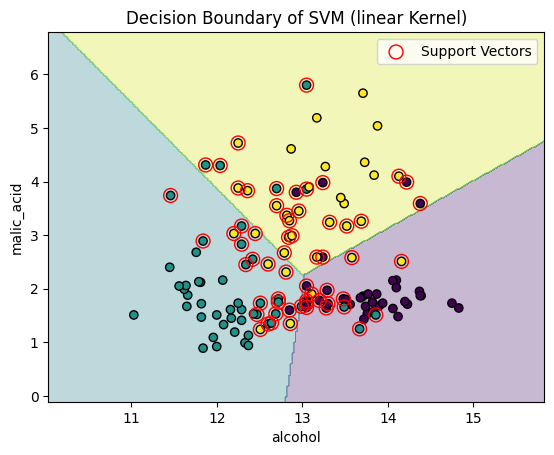

In [ ]:
runner_binary(X, y, kernel="linear", feat_name=["alcohol", "malic_acid"])

5.2 Train an SVM model with an RBF (Gaussian) kernel

Classification Report for Binary-class SVM:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.81      0.81      0.81        21
           2       0.58      0.50      0.54        14

    accuracy                           0.72        54
   macro avg       0.70      0.70      0.70        54
weighted avg       0.72      0.72      0.72        54

Accuracy: 0.7222222222222222
Cross-Validation Scores: [0.92       0.68       0.8        0.76       0.70833333]
Mean Cross-Validation Accuracy: 0.7736666666666667
Std Cross-Validation Accuracy: 0.08406611154984577


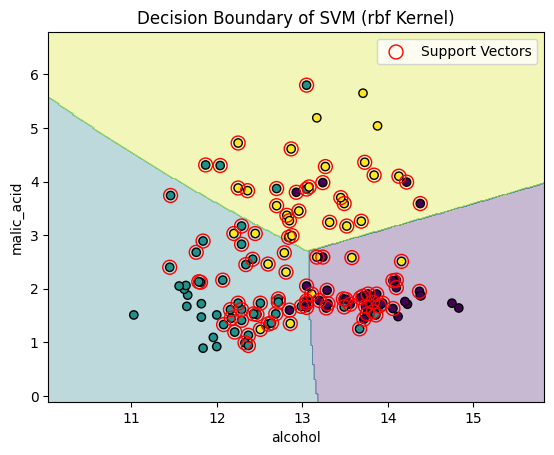

In [ ]:
runner_binary(X, y, kernel="rbf", feat_name=["alcohol", "malic_acid"])

5.3 Train a K-NN model

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.80      0.76      0.78        21
           2       0.50      0.57      0.53        14

    accuracy                           0.72        54
   macro avg       0.71      0.71      0.71        54
weighted avg       0.73      0.72      0.73        54



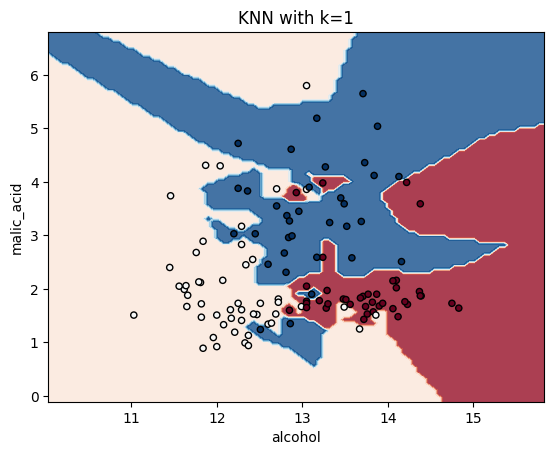

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        19
           1       0.94      0.76      0.84        21
           2       0.61      0.79      0.69        14

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.79        54
weighted avg       0.82      0.80      0.80        54



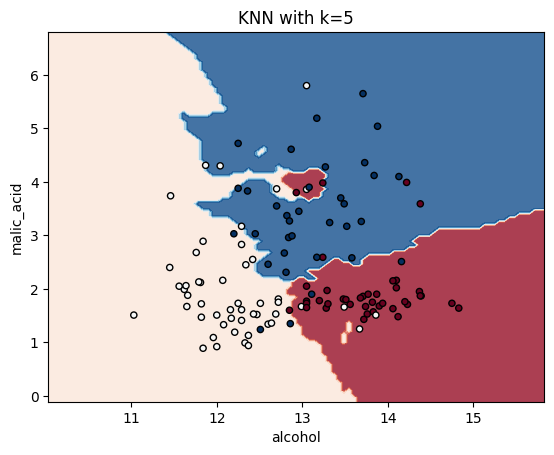

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.95      0.86      0.90        21
           2       0.65      0.79      0.71        14

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.83      0.81      0.82        54



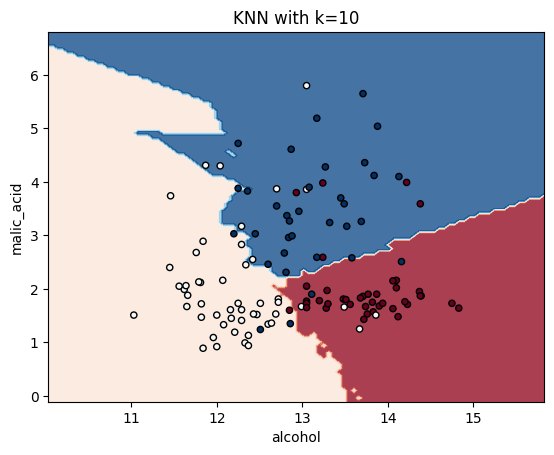

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.94      0.81      0.87        21
           2       0.62      0.71      0.67        14

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.81      0.80      0.80        54



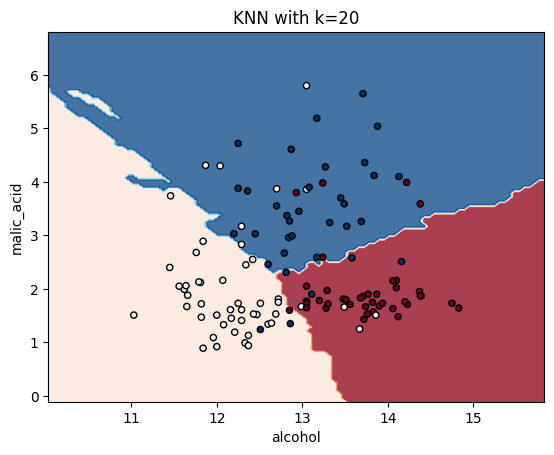

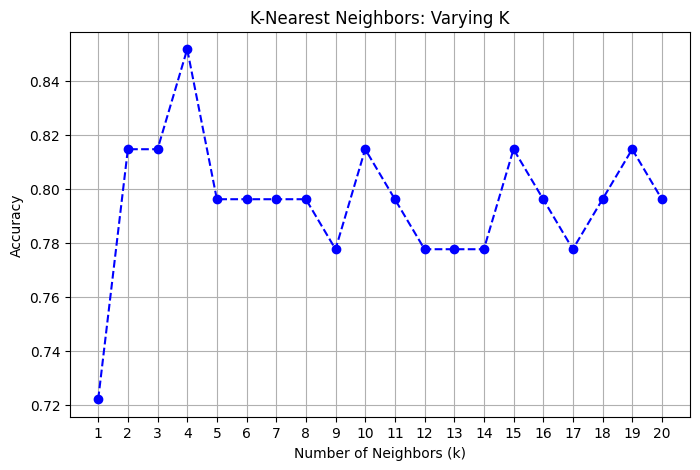

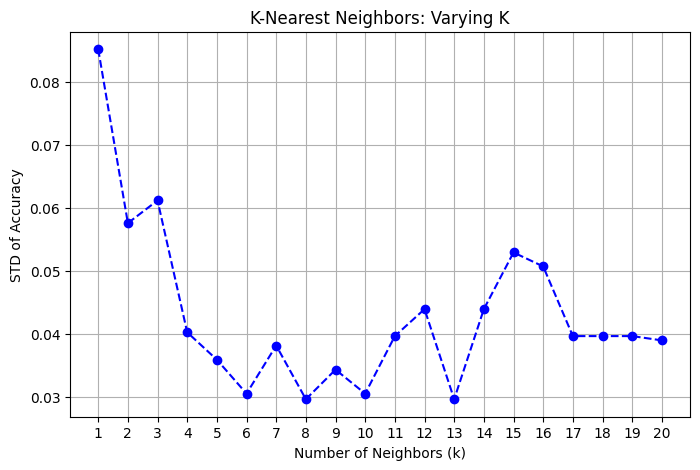

Accuracies for each k: {1: 0.7222222222222222, 2: 0.8148148148148148, 3: 0.8148148148148148, 4: 0.8518518518518519, 5: 0.7962962962962963, 6: 0.7962962962962963, 7: 0.7962962962962963, 8: 0.7962962962962963, 9: 0.7777777777777778, 10: 0.8148148148148148, 11: 0.7962962962962963, 12: 0.7777777777777778, 13: 0.7777777777777778, 14: 0.7777777777777778, 15: 0.8148148148148148, 16: 0.7962962962962963, 17: 0.7777777777777778, 18: 0.7962962962962963, 19: 0.8148148148148148, 20: 0.7962962962962963}
Mean cv accuracies for each k: {1: 0.7166666666666667, 2: 0.7413333333333333, 3: 0.7986666666666667, 4: 0.7823333333333333, 5: 0.7983333333333333, 6: 0.8063333333333335, 7: 0.8066666666666666, 8: 0.7903333333333333, 9: 0.7986666666666667, 10: 0.8063333333333335, 11: 0.8063333333333335, 12: 0.7983333333333333, 13: 0.7903333333333333, 14: 0.7983333333333333, 15: 0.7903333333333333, 16: 0.7983333333333333, 17: 0.8063333333333335, 18: 0.8063333333333335, 19: 0.8063333333333335, 20: 0.7903333333333333}
ST

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.ticker as mticker
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay


def plot_clf_boundary(knn, X, y, title, name_col1, name_col2):
    fig, ax = plt.subplots()

    cmap = plt.cm.RdBu
    DecisionBoundaryDisplay.from_estimator(
        knn, X, response_method="predict", cmap=cmap, alpha=0.8, ax=ax
    )
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k", cmap=cmap)


    ax.set_xlabel(name_col1)
    ax.set_ylabel(name_col2)
    ax.set_title(title)
    plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

name_col1 = wine_df.columns[0]
name_col2 = wine_df.columns[1]

# Try different K
k_values = range(1, 21)
accuracies = []
std_accuracies = []
mean_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


    cv_score = cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    std_accuracies.append(cv_score.std())
    mean_accuracies.append(cv_score.mean())


    if k in [1, 5, 10,20]:
        print(classification_report(y_test, y_pred))
        plot_clf_boundary(knn, X_train, y_train, f"KNN with k={k}", name_col1, name_col2)

# plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('K-Nearest Neighbors: Varying K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True)
plt.show()

# plot std of accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, std_accuracies, marker='o', linestyle='--', color='b')
plt.title('K-Nearest Neighbors: Varying K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('STD of Accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True)
plt.show()

print("Accuracies for each k:", dict(zip(k_values, accuracies)))
print("Mean cv accuracies for each k:", dict(zip(k_values, mean_accuracies)))
print("STD cv accurcies for each k:", dict(zip(k_values, std_accuracies)))

# Question 6

6.1 Acquire the data using the following code and sample 1,000 rows

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist_df = pd.DataFrame(mnist.data, columns=mnist.feature_names)
mnist_df['target'] = mnist.target
mnist_df = mnist_df.sample(n=1000, random_state=42)

mnist_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
46730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
48393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
41416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
34506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
43725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
18221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
30874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
63625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


6.2 visualizations

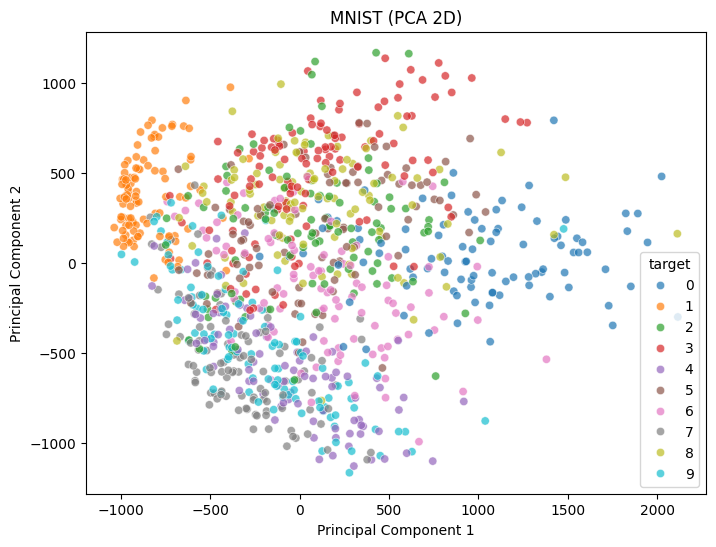

[0.09906236 0.06941622]


In [ ]:
from sklearn.decomposition import PCA

# reduce dimention by PCA
X = mnist_df.drop('target', axis=1)
y = mnist_df['target']

y_int = y.astype(int)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_plot = pd.DataFrame({
    'pc1': X_pca[:, 0],
    'pc2': X_pca[:, 1],
    'target': y_int
})


plt.figure(figsize=(8, 6))


sns.scatterplot(
    x='pc1',
    y='pc2',
    hue='target',
    data=df_plot,
    palette='tab10',
    alpha=0.7
)



plt.title("MNIST (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Train an SVM model with a linear kernel

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

y_pred = svm.predict(X_test)
print("Classification Report for linear SVM:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")
print(f"Std Cross-Validation Accuracy: {cv_scores.std()}")



Classification Report for Binary-class SVM:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.88      1.00      0.94        29
           2       0.78      0.86      0.82        21
           3       0.94      0.82      0.88        40
           4       0.79      0.88      0.83        25
           5       0.87      0.87      0.87        31
           6       0.90      1.00      0.95        28
           7       0.94      0.88      0.91        34
           8       0.88      0.88      0.88        24
           9       0.94      0.85      0.89        40

    accuracy                           0.89       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300

Accuracy: 0.8933333333333333
Cross-Validation Scores: [0.88571429 0.85       0.84285714 0.80714286 0.89285714]
Mean Cross-Validation Accuracy: 0.8557142857142859
Std Cross-Validation Accuracy: 0.03

Train an SVM model with an RBF (Gaussian) kernel

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

y_pred = svm.predict(X_test)
print("Classification Report for RBF SVM:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")
print(f"Std Cross-Validation Accuracy: {cv_scores.std()}")

Classification Report for Binary-class SVM:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.88      1.00      0.94        29
           2       0.86      0.90      0.88        21
           3       0.95      0.88      0.91        40
           4       0.88      0.88      0.88        25
           5       1.00      0.87      0.93        31
           6       0.90      1.00      0.95        28
           7       0.91      0.88      0.90        34
           8       0.92      0.96      0.94        24
           9       0.90      0.88      0.89        40

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Accuracy: 0.9166666666666666
Cross-Validation Scores: [0.87142857 0.87142857 0.86428571 0.82857143 0.90714286]
Mean Cross-Validation Accuracy: 0.8685714285714287
Std Cross-Validation Accuracy: 0.02

Train a K-NN model

Metric of k = 1:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.81      1.00      0.89        29
           2       0.86      0.86      0.86        21
           3       0.85      0.88      0.86        40
           4       0.71      0.80      0.75        25
           5       0.96      0.87      0.92        31
           6       0.93      0.93      0.93        28
           7       0.94      0.88      0.91        34
           8       0.95      0.79      0.86        24
           9       0.84      0.78      0.81        40

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300

Metric of k = 5:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.66      1.00      0.79        29
           2       0.94      0.76      0.84 

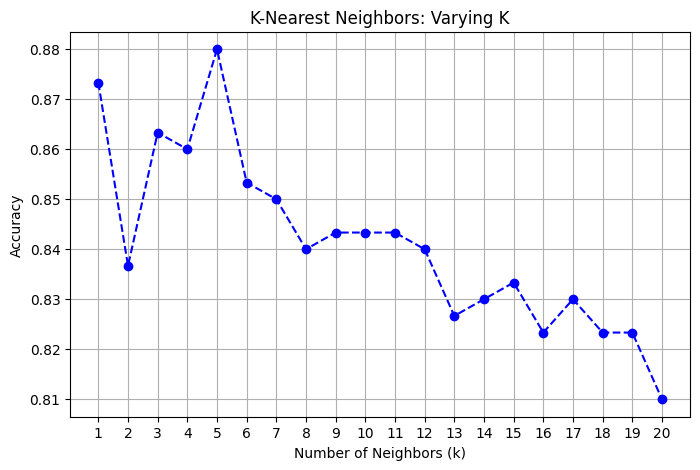

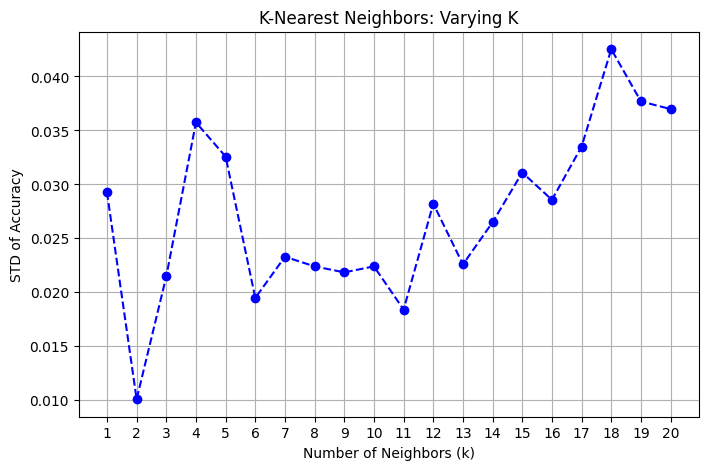

Accuracies for each k: {1: 0.8733333333333333, 2: 0.8366666666666667, 3: 0.8633333333333333, 4: 0.86, 5: 0.88, 6: 0.8533333333333334, 7: 0.85, 8: 0.84, 9: 0.8433333333333334, 10: 0.8433333333333334, 11: 0.8433333333333334, 12: 0.84, 13: 0.8266666666666667, 14: 0.83, 15: 0.8333333333333334, 16: 0.8233333333333334, 17: 0.83, 18: 0.8233333333333334, 19: 0.8233333333333334, 20: 0.81}
Mean cv accuracies for each k: {1: 0.8357142857142857, 2: 0.8071428571428572, 3: 0.8257142857142856, 4: 0.8385714285714286, 5: 0.8357142857142857, 6: 0.8257142857142856, 7: 0.8314285714285713, 8: 0.832857142857143, 9: 0.8299999999999998, 10: 0.8171428571428571, 11: 0.8114285714285714, 12: 0.8071428571428572, 13: 0.8, 14: 0.7942857142857143, 15: 0.7871428571428571, 16: 0.7857142857142858, 17: 0.7785714285714285, 18: 0.7814285714285715, 19: 0.7828571428571428, 20: 0.7714285714285715}
STD cv accurcies for each k: {1: 0.029277002188455994, 2: 0.010101525445522102, 3: 0.02147613768338988, 4: 0.03574284572341944, 5:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Try different K
k_values = range(1, 21)
accuracies = []
std_accuracies = []
mean_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


    cv_score = cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    std_accuracies.append(cv_score.std())
    mean_accuracies.append(cv_score.mean())


    if k in [1, 5, 10,20]:
        print(f"Metric of k = {k}:")
        print(classification_report(y_test, y_pred))


# plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('K-Nearest Neighbors: Varying K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True)
plt.show()

# plot std of accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, std_accuracies, marker='o', linestyle='--', color='b')
plt.title('K-Nearest Neighbors: Varying K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('STD of Accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True)
plt.show()

print("Accuracies for each k:", dict(zip(k_values, accuracies)))
print("Mean cv accuracies for each k:", dict(zip(k_values, mean_accuracies)))
print("STD cv accurcies for each k:", dict(zip(k_values, std_accuracies)))